In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from river import ensemble
from river import compose
from river import preprocessing
from river import tree
from river import optim
from river import imblearn
from river import linear_model

from pprint import pprint

from source.bank_dataset import BankDataset
from source.river_utils import evaluate_binary_model

In [10]:
sns.set(rc={'figure.figsize':(15, 5)})

In [11]:
# Creating a data frame
df = pd.read_csv("../datasets/bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
bank_dataset = BankDataset()
counts = collections.Counter(y for _, y in bank_dataset)

for c, count in counts.items():
    print(f'{c}: {count} ({count / sum(counts.values()):.5%})')

no: 36548 (88.73458%)
yes: 4640 (11.26542%)


### Predict with River classification models

#### Apply data transformations

In [13]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
selected_categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']
numerical_features = (feature for feature in df.columns if feature not in categorical_features + ['y'])

transform_pipeline = compose.Select(selected_categorical_features[0])
for feature in selected_categorical_features[1:]:
    transform_pipeline += compose.Select(feature)
transform_pipeline |= preprocessing.OneHotEncoder()

for feature in numerical_features:
    transform_pipeline += compose.Select(feature)
transform_pipeline |= preprocessing.MinMaxScaler()

for idx, (x, y) in enumerate(bank_dataset):
    print(f'Initial features: {x}\n')
    x = transform_pipeline.transform_one(x)
    print(f'Transformed features: {x}\n\n')
    if idx + 1 == 10:
        break

Initial features: {'age': 56, 'job': 'housemaid', 'marital': 'married', 'education': 'basic.4y', 'default': 'no', 'housing': 'no', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 261, 'campaign': 1, 'pdays': 999, 'previous': 0, 'poutcome': 'nonexistent', 'emp.var.rate': 1.1, 'cons.price.idx': 93.994, 'cons.conf.idx': -36.4, 'euribor3m': 4.857, 'nr.employed': 5191.0}

Transformed features: {'nr.employed': 0.0, 'euribor3m': 0.0, 'cons.conf.idx': 0.0, 'cons.price.idx': 0.0, 'emp.var.rate': 0.0, 'previous': 0.0, 'pdays': 0.0, 'campaign': 0.0, 'duration': 0.0, 'age': 0.0, 'poutcome_nonexistent': 0.0, 'loan_no': 0.0, 'housing_no': 0.0, 'education_basic.4y': 0.0, 'marital_married': 0.0, 'job_housemaid': 0.0}


Initial features: {'age': 57, 'job': 'services', 'marital': 'married', 'education': 'high.school', 'default': 'unknown', 'housing': 'no', 'loan': 'no', 'contact': 'telephone', 'month': 'may', 'day_of_week': 'mon', 'duration': 149, 'campaign': 1, '

#### Predict with Adaptive Random Forest Classifier

Index: 1000; Accuracy: 98.10%; CohenKappa: 0.00%; WeightedF1: 97.16%
Index: 2000; Accuracy: 97.90%; CohenKappa: 0.00%; WeightedF1: 96.86%
Index: 3000; Accuracy: 97.63%; CohenKappa: 0.00%; WeightedF1: 96.46%
Index: 4000; Accuracy: 97.22%; CohenKappa: 0.00%; WeightedF1: 95.86%
Index: 5000; Accuracy: 97.10%; CohenKappa: 0.00%; WeightedF1: 95.67%
Index: 6000; Accuracy: 97.02%; CohenKappa: 0.00%; WeightedF1: 95.55%
Index: 7000; Accuracy: 97.06%; CohenKappa: 0.00%; WeightedF1: 95.61%
Index: 8000; Accuracy: 96.87%; CohenKappa: 0.00%; WeightedF1: 95.34%
Index: 9000; Accuracy: 96.72%; CohenKappa: 0.65%; WeightedF1: 95.12%
Index: 10000; Accuracy: 96.67%; CohenKappa: 0.58%; WeightedF1: 95.04%
Index: 11000; Accuracy: 96.60%; CohenKappa: 0.51%; WeightedF1: 94.94%
Index: 12000; Accuracy: 96.51%; CohenKappa: 0.46%; WeightedF1: 94.80%
Index: 13000; Accuracy: 96.38%; CohenKappa: 0.41%; WeightedF1: 94.62%
Index: 14000; Accuracy: 96.19%; CohenKappa: 0.36%; WeightedF1: 94.33%
Index: 15000; Accuracy: 95.99

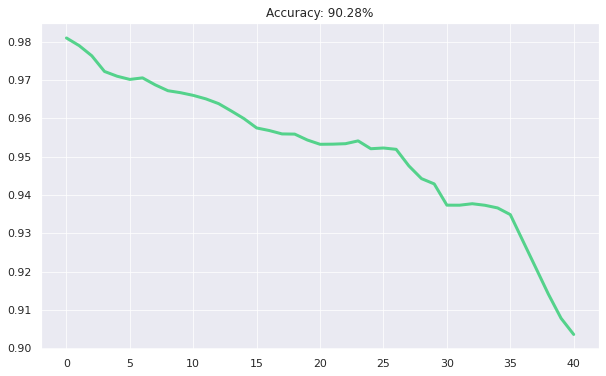

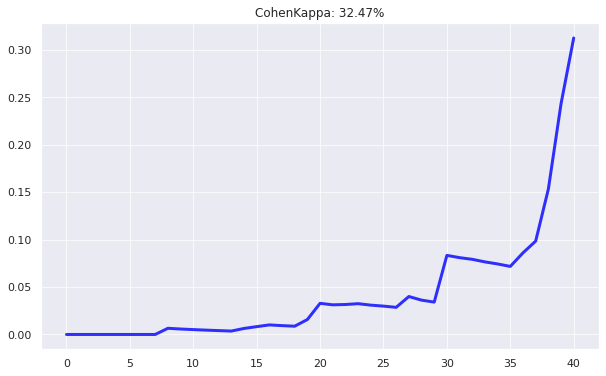

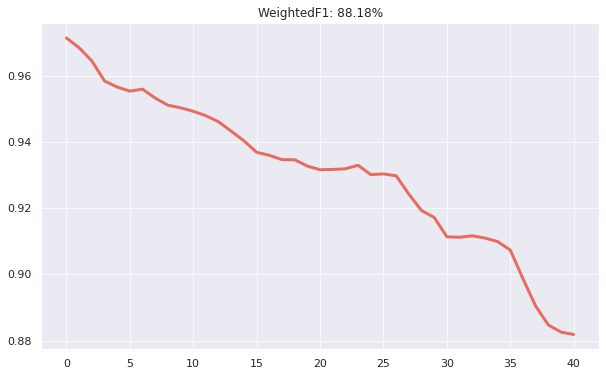

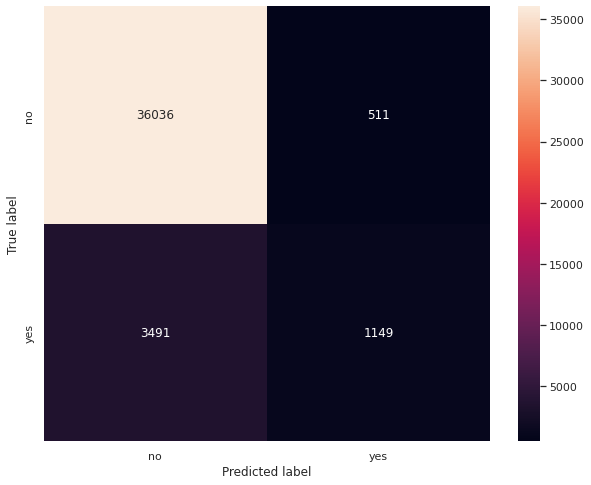

In [7]:
ARF_model = transform_pipeline | ensemble.AdaptiveRandomForestClassifier(n_models=20, seed=42, split_criterion='gini')
evaluate_binary_model(bank_dataset, ARF_model)

#### Predict with Streaming Random Patches ensemble classifier

Index: 1000; Accuracy: 98.30%; CohenKappa: 36.32%; WeightedF1: 97.96%
Index: 2000; Accuracy: 97.50%; CohenKappa: 23.07%; WeightedF1: 97.16%
Index: 3000; Accuracy: 97.13%; CohenKappa: 16.05%; WeightedF1: 96.62%
Index: 4000; Accuracy: 96.62%; CohenKappa: 11.51%; WeightedF1: 95.91%
Index: 5000; Accuracy: 96.66%; CohenKappa: 19.39%; WeightedF1: 96.05%
Index: 6000; Accuracy: 96.60%; CohenKappa: 18.24%; WeightedF1: 95.92%
Index: 7000; Accuracy: 96.61%; CohenKappa: 19.26%; WeightedF1: 95.99%
Index: 8000; Accuracy: 96.47%; CohenKappa: 20.56%; WeightedF1: 95.82%
Index: 9000; Accuracy: 96.39%; CohenKappa: 21.62%; WeightedF1: 95.68%
Index: 10000; Accuracy: 96.31%; CohenKappa: 20.74%; WeightedF1: 95.58%
Index: 11000; Accuracy: 96.30%; CohenKappa: 24.23%; WeightedF1: 95.64%
Index: 12000; Accuracy: 96.28%; CohenKappa: 26.40%; WeightedF1: 95.64%
Index: 13000; Accuracy: 96.18%; CohenKappa: 26.38%; WeightedF1: 95.50%
Index: 14000; Accuracy: 96.03%; CohenKappa: 28.18%; WeightedF1: 95.36%
Index: 15000; A

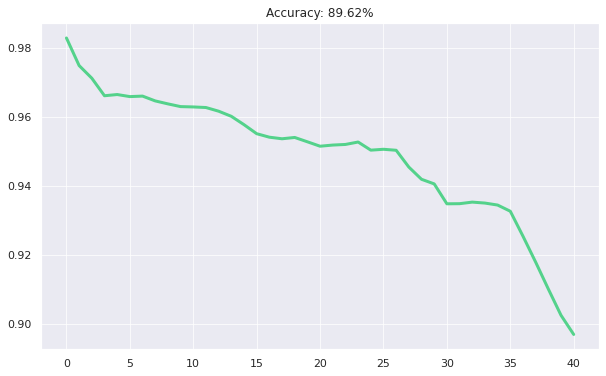

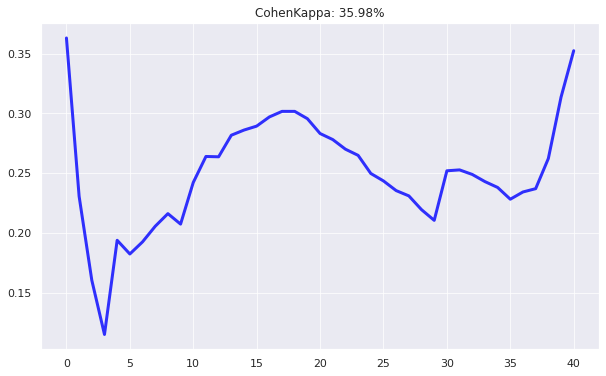

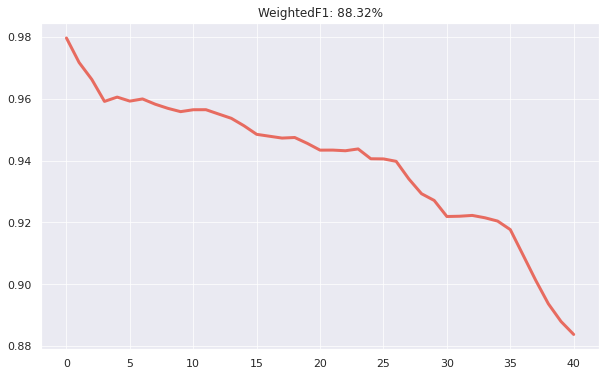

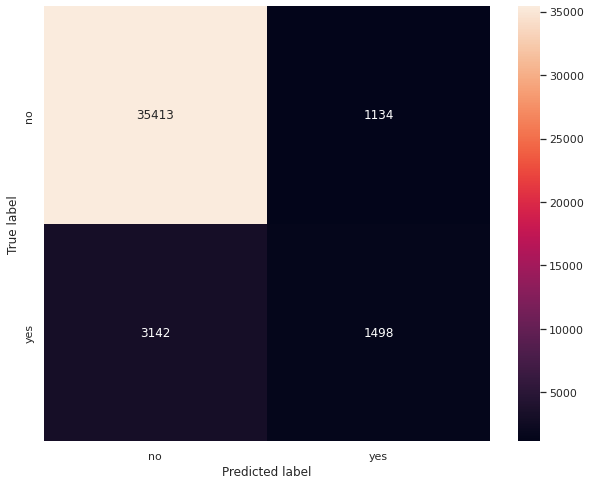

In [14]:
base_model = tree.HoeffdingTreeClassifier(
     grace_period=50, delta=0.01
)
SRP_model_obj = ensemble.SRPClassifier(
     model=base_model, n_models=3, seed=42
)
SRP_model = transform_pipeline | SRP_model_obj
evaluate_binary_model(bank_dataset, SRP_model)